# # Data Collection

### Dataset Description

Dataset Link: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?utm_source=chatgpt.com

---

### 🧾 **Dataset Title:**  
**Air Quality Data in India (2015 - 2020)**

### 📅 **Time Period Covered:**  
January 2015 to July 2020

### 📍 **Geographical Coverage:**  
Data collected from multiple cities across **India**, including major metros like Delhi, Mumbai, Ahmedabad, Bengaluru, Hyderabad, Kolkata, Chennai, and more.

### 📊 **Description:**  
This dataset contains daily and hourly **air quality data** from stations across India. It includes pollutant measurements and corresponding **Air Quality Index (AQI)** values. It is useful for time series analysis, environmental research, air pollution prediction, and more.

---

### 📌 **Columns and Their Meaning:**

| Column       | Description |
|--------------|-------------|
| `City`       | Name of the city where the air quality monitoring station is located |
| `Date`       | Date of the recorded data |
| `PM2.5`      | Fine inhalable particles ≤2.5 micrometers in diameter |
| `PM10`       | Coarse particles ≤10 micrometers |
| `NO`         | Nitric Oxide concentration |
| `NO2`        | Nitrogen Dioxide concentration |
| `NOx`        | Sum of NO and NO2 |
| `NH3`        | Ammonia concentration |
| `CO`         | Carbon Monoxide concentration |
| `SO2`        | Sulfur Dioxide concentration |
| `O3`         | Ozone concentration |
| `Benzene`    | Benzene concentration (a harmful volatile organic compound) |
| `Toluene`    | Toluene concentration |
| `Xylene`     | Xylene concentration |
| `AQI`        | Calculated Air Quality Index based on pollutant levels |
| `AQI_Bucket` | Category of air quality (e.g., Good, Satisfactory, Moderate, Poor, etc.) |

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
import joblib

In [ ]:
df = pd.read_csv(r"dataset\city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df = df[df['AQI_Bucket'].notnull()]
df.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [ ]:
df.isnull().sum() / len(df) * 100

City           0.000000
Date           0.000000
PM2.5          2.728370
PM10          28.515091
NO             1.557344
NO2            1.573441
NOx            7.472837
NH3           26.301811
CO             1.790744
SO2            2.434608
O3             3.247485
Benzene       14.225352
Toluene       23.444668
Xylene        61.859155
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [ ]:
df["City"].value_counts()

City
Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: count, dtype: int64

In [ ]:
df["AQI_Bucket"].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

# # Data Preprocess

In [ ]:
# Map AQI_Bucket to 3 classes
def simplify_aqi_bucket(bucket):
    if bucket == "Good":
        return "Good"
    elif bucket in ["Satisfactory", "Moderate"]:
        return "Moderate"
    else:  # Poor, Very Poor, Severe
        return "Poor"

df["AQI_Bucket"] = df["AQI_Bucket"].apply(simplify_aqi_bucket)

# Drop AQI column to prevent leakage
df = df.drop("AQI", axis=1)

# Convert City to numerical (e.g., one-hot encoding)
df = pd.get_dummies(df, columns=["City"], drop_first=True)

# Check the updated target distribution
df["AQI_Bucket"].value_counts()

C:\Users\0877\AppData\Local\Temp\ipykernel_11232\29675270.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AQI_Bucket"] = df["AQI_Bucket"].apply(simplify_aqi_bucket)


AQI_Bucket
Moderate    17053
Poor         6456
Good         1341
Name: count, dtype: int64

In [ ]:
df.drop(["Date", "Xylene"], axis=1, inplace=True)
df.isnull().sum() / len(df) * 100

PM2.5                       2.728370
PM10                       28.515091
NO                          1.557344
NO2                         1.573441
NOx                         7.472837
NH3                        26.301811
CO                          1.790744
SO2                         2.434608
O3                          3.247485
Benzene                    14.225352
Toluene                    23.444668
AQI_Bucket                  0.000000
City_Aizawl                 0.000000
City_Amaravati              0.000000
City_Amritsar               0.000000
City_Bengaluru              0.000000
City_Bhopal                 0.000000
City_Brajrajnagar           0.000000
City_Chandigarh             0.000000
City_Chennai                0.000000
City_Coimbatore             0.000000
City_Delhi                  0.000000
City_Ernakulam              0.000000
City_Gurugram               0.000000
City_Guwahati               0.000000
City_Hyderabad              0.000000
City_Jaipur                 0.000000
C

In [ ]:
df.shape

(24850, 37)

In [ ]:
# Get all numerical columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene'],
      dtype='object')

Handle missing values use of SimpleImputer

In [ ]:
# Use SimpleImputer to impute numerical columns with the mean or median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
df.isnull().sum() / len(df) * 100

PM2.5                      0.0
PM10                       0.0
NO                         0.0
NO2                        0.0
NOx                        0.0
NH3                        0.0
CO                         0.0
SO2                        0.0
O3                         0.0
Benzene                    0.0
Toluene                    0.0
AQI_Bucket                 0.0
City_Aizawl                0.0
City_Amaravati             0.0
City_Amritsar              0.0
City_Bengaluru             0.0
City_Bhopal                0.0
City_Brajrajnagar          0.0
City_Chandigarh            0.0
City_Chennai               0.0
City_Coimbatore            0.0
City_Delhi                 0.0
City_Ernakulam             0.0
City_Gurugram              0.0
City_Guwahati              0.0
City_Hyderabad             0.0
City_Jaipur                0.0
City_Jorapokhar            0.0
City_Kochi                 0.0
City_Kolkata               0.0
City_Lucknow               0.0
City_Mumbai                0.0
City_Pat

In [ ]:
df["AQI_Bucket"].value_counts()

AQI_Bucket
Moderate    17053
Poor         6456
Good         1341
Name: count, dtype: int64

In [ ]:
#label encoding the data.
from sklearn.preprocessing import LabelEncoder

# Get object column names
original_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("====================================================")
    print("====================================================")

Mapping for column 'AQI_Bucket':
Label 0: Good
Label 1: Moderate
Label 2: Poor


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop("AQI_Bucket", axis=1)
y = df["AQI_Bucket"]

Oversample & Undersample methods to balance the data

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Define sampling strategies as dictionaries
# Oversample minorities (Good, Poor) to 50% of Moderate, then undersample Moderate
oversample_strategy = {0: 8526, 2: 8526}  # Good (0) and Poor (2) to ~half of Moderate (17053 / 2)
undersample_strategy = {0: 6456, 1: 6456, 2: 6456}  # Final balanced counts

pipeline = Pipeline([
    ('oversample', SVMSMOTE(sampling_strategy=oversample_strategy, k_neighbors=5, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42))
])

# Apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check the balance
print(f"Original data distribution: {Counter(y)}")
print(f"Resampled data distribution: {Counter(y_resampled)}")

Original data distribution: Counter({1: 17053, 2: 6456, 0: 1341})
Resampled data distribution: Counter({0: 6456, 1: 6456, 2: 6456})


# Data splitting

In [ ]:
### Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, stratify = y_resampled, random_state = 42)

# # Algorithm Implemendation

In [ ]:
# Initialize Logistoic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# model training
lr_model.fit(X_train, y_train)

# model testing
lr_predictions = lr_model.predict(X_test)

# model evaluation

# Accuracy score
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistoic Regression Classifier Accuracy:", lr_accuracy)

# Classification Report
lr_cls_rpt = classification_report(y_test, lr_predictions)
print(lr_cls_rpt)

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Classifier Confusion Matrix:\n", lr_cm)

# Save trained model
joblib.dump(lr_model, r'models\lr_model.joblib')

Logistoic Regression Classifier Accuracy: 0.8575116159008777
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1937
           1       0.83      0.73      0.78      1937
           2       0.88      0.93      0.90      1937

    accuracy                           0.86      5811
   macro avg       0.86      0.86      0.86      5811
weighted avg       0.86      0.86      0.86      5811

Logistoic Regression Classifier Confusion Matrix:
 [[1778  154    5]
 [ 297 1411  229]
 [   5  138 1794]]


c:\Users\0877\.conda\envs\tk174464\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['models\\lr_model.joblib']

In [ ]:
# Initialize AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()

# model training
adaboost_model.fit(X_train, y_train)

# model testing
adaboost_predictions = adaboost_model.predict(X_test)

# model evaluation

# Accuracy score
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)

# Classification Report
adaboost_cls_rpt = classification_report(y_test, adaboost_predictions)
print(adaboost_cls_rpt)

# Confusion Matrix
adaboost_cm = confusion_matrix(y_test, adaboost_predictions)
print("AdaBoost Classifier Confusion Matrix:\n", adaboost_cm)

# Save trained model
joblib.dump(adaboost_model, r'models\adaboost_model.joblib')

AdaBoost Classifier Accuracy: 0.8482188951987609
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1937
           1       0.81      0.72      0.76      1937
           2       0.86      0.93      0.89      1937

    accuracy                           0.85      5811
   macro avg       0.85      0.85      0.85      5811
weighted avg       0.85      0.85      0.85      5811

AdaBoost Classifier Confusion Matrix:
 [[1718  215    4]
 [ 236 1400  301]
 [   7  119 1811]]


['models\\adaboost_model.joblib']

In [ ]:
# Initialize MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()

# model training
mlp_model.fit(X_train, y_train)

# model testing
mlp_predictions = mlp_model.predict(X_test)

# model evaluation

# Accuracy score
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Classifier Accuracy:", mlp_accuracy)

# Classification Report
mlp_cls_rpt = classification_report(y_test, mlp_predictions)
print(mlp_cls_rpt)

# Confusion Matrix
mlp_cm = confusion_matrix(y_test, mlp_predictions)
print("MLP Classifier Confusion Matrix:\n", mlp_cm)

# Save trained model
joblib.dump(mlp_model, r'models\mlp_model.joblib')

MLP Classifier Accuracy: 0.9041473068318706
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1937
           1       0.92      0.78      0.85      1937
           2       0.86      0.97      0.91      1937

    accuracy                           0.90      5811
   macro avg       0.91      0.90      0.90      5811
weighted avg       0.91      0.90      0.90      5811

MLP Classifier Confusion Matrix:
 [[1847   89    1]
 [ 109 1520  308]
 [   2   48 1887]]


['models\\mlp_model.joblib']

In [ ]:
# Initialize Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# model training
rf_model.fit(X_train, y_train)

# model testing
rf_predictions = rf_model.predict(X_test)

# model evaluation

# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Classification Report
rf_cls_rpt = classification_report(y_test, rf_predictions)
print(rf_cls_rpt)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classifier Confusion Matrix:\n", rf_cm)

# Save trained model
joblib.dump(rf_model, r'models\rf_model.joblib')

Random Forest Classifier Accuracy: 0.9402856651178799
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1937
           1       0.94      0.88      0.91      1937
           2       0.93      0.96      0.95      1937

    accuracy                           0.94      5811
   macro avg       0.94      0.94      0.94      5811
weighted avg       0.94      0.94      0.94      5811

Random Forest Classifier Confusion Matrix:
 [[1900   37    0]
 [  95 1706  136]
 [   3   76 1858]]


['models\\rf_model.joblib']

In [ ]:
# Initialize Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# model training
dt_model.fit(X_train, y_train)

# model testing
dt_predictions = dt_model.predict(X_test)

# model evaluation

# Accuracy score
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

# Classification Report
dt_cls_rpt = classification_report(y_test, dt_predictions)
print(dt_cls_rpt)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Classifier Confusion Matrix:\n", dt_cm)

# Save trained model
joblib.dump(dt_model, r'models\dt_model.joblib')

Decision Tree Classifier Accuracy: 0.9086215797625193
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1937
           1       0.88      0.85      0.86      1937
           2       0.91      0.93      0.92      1937

    accuracy                           0.91      5811
   macro avg       0.91      0.91      0.91      5811
weighted avg       0.91      0.91      0.91      5811

Decision Tree Classifier Confusion Matrix:
 [[1846   90    1]
 [ 126 1638  173]
 [   8  133 1796]]


['models\\dt_model.joblib']

In [ ]:
# Initialize XGB Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

# model training
xgb_model.fit(X_train, y_train)

# model testing
xgb_predictions = xgb_model.predict(X_test)

# model evaluation

# Accuracy score
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGB Classifier Accuracy:", xgb_accuracy)

# Classification Report
xgb_cls_rpt = classification_report(y_test, xgb_predictions)
print(xgb_cls_rpt)

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("XGB Classifier Confusion Matrix:\n", xgb_cm)

# Save trained model
joblib.dump(xgb_model, r'models\xgb_model.joblib')

XGB Classifier Accuracy: 0.9425228015832042
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1937
           1       0.94      0.89      0.91      1937
           2       0.93      0.96      0.95      1937

    accuracy                           0.94      5811
   macro avg       0.94      0.94      0.94      5811
weighted avg       0.94      0.94      0.94      5811

XGB Classifier Confusion Matrix:
 [[1907   30    0]
 [  89 1715  133]
 [   4   78 1855]]


['models\\xgb_model.joblib']

# # Model comparision

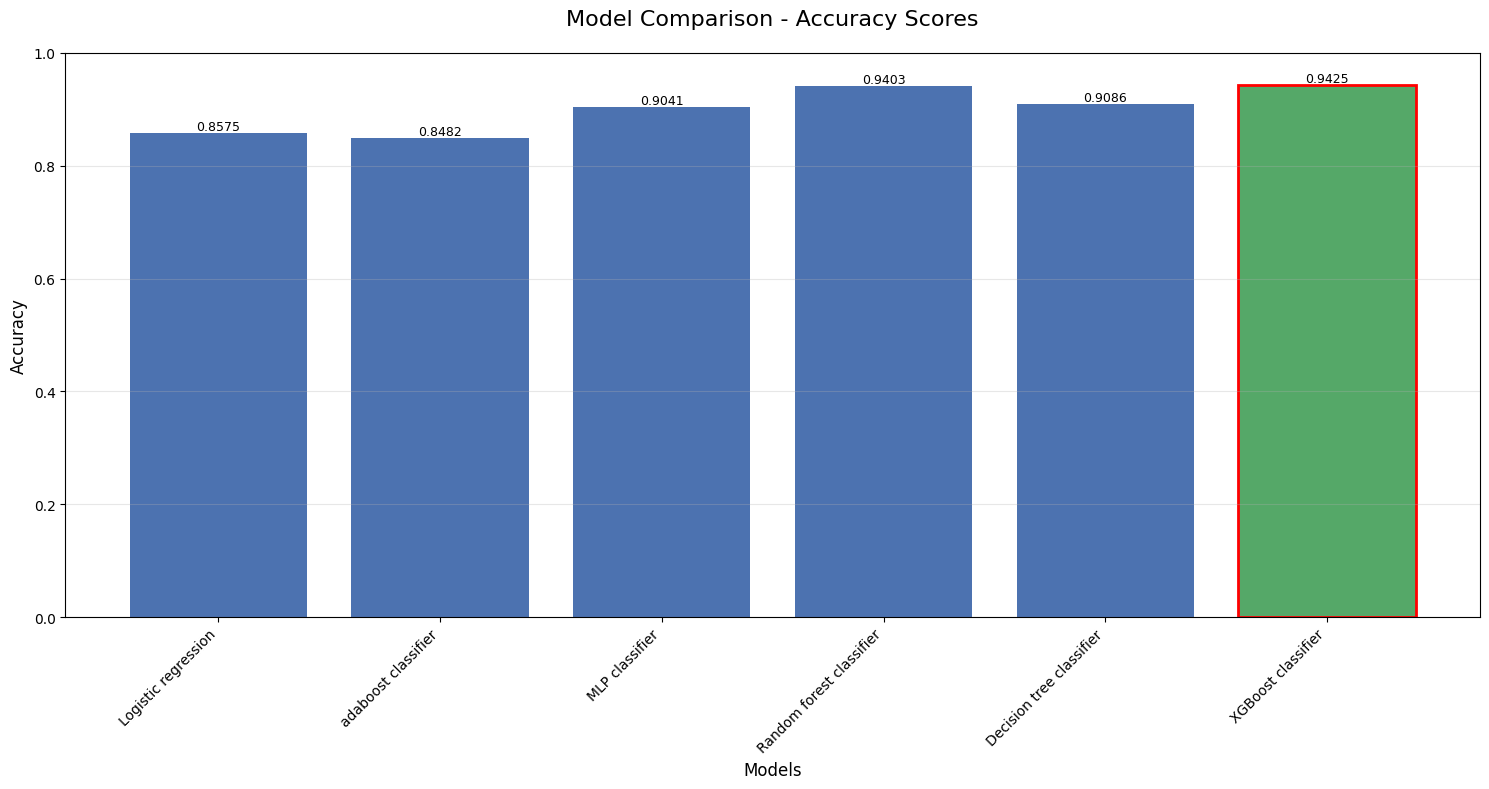

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies from the output
models = [
    'Logistic regression', 'adaboost classifier', 'MLP classifier', 
    'Random forest classifier', 'Decision tree classifier', 'XGBoost classifier'
]

accuracies = [
    lr_accuracy, adaboost_accuracy, mlp_accuracy, rf_accuracy, dt_accuracy, xgb_accuracy
]

# Create figure and axis
plt.figure(figsize=(15, 8))
ax = plt.subplot()

# Create bars
bars = ax.bar(models, accuracies, color=['#4C72B0' if acc < max(accuracies) else '#55A868' for acc in accuracies])

# Customize plot
plt.title('Model Comparison - Accuracy Scores', fontsize=16, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom',
            fontsize=9)

# Highlight the best performing model
max_acc = max(accuracies)
max_index = accuracies.index(max_acc)
bars[max_index].set_edgecolor('red')
bars[max_index].set_linewidth(2)

plt.tight_layout()
plt.show()

# # Model saving

In [ ]:
# Save label encoder mapping
joblib.dump(label_encoders['AQI_Bucket'], r'models\label_encoder.joblib')

# Save feature names
joblib.dump(list(X_train.columns), r'models\feature_columns.joblib')

# Save imputation medians
joblib.dump(imputer.statistics_, r'models\imputation_medians.joblib')

['models\\imputation_medians.joblib']

In [ ]:
# Convert resampled data to DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns.tolist())

# 1. Extract city names from one-hot encoded columns
city_columns = [col for col in resampled_df.columns if col.startswith('City_')]
resampled_df['City'] = resampled_df[city_columns].idxmax(axis=1).str.replace('City_', '')

# 2. Drop one-hot encoded city columns
resampled_df = resampled_df.drop(columns=city_columns)

# 3. Decode target labels
resampled_df['AQI_Bucket'] = label_encoders['AQI_Bucket'].inverse_transform(y_resampled)

# 4. Reorder columns to match original format
column_order = ['City'] + [col for col in resampled_df.columns if col not in ['City', 'AQI_Bucket']] + ['AQI_Bucket']
resampled_df = resampled_df[column_order]

# 5. Save to CSV
resampled_df.to_csv(r'dataset\Final_data.csv', index=False)

In [ ]:
resampled_df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
31016,Shillong,11.647268,16.592840,0.972397,2.777022,1.109221,2.828610,0.189527,7.880148,18.548107,-0.018274,0.150473,Good
26466,Amritsar,48.785000,41.601496,17.713035,14.119500,30.622313,9.733486,0.000000,2.825710,22.270836,5.248010,7.378327,Good
31928,Kolkata,12.408150,31.246709,3.308086,5.358086,8.726172,6.900215,0.270000,5.630537,23.718173,1.075957,5.341914,Good
21830,Shillong,21.180000,26.770000,0.860000,2.720000,1.170000,2.780000,0.230000,3.300000,33.190000,132.800000,132.800000,Good
14817,Hyderabad,20.240000,44.740000,3.960000,27.590000,17.090000,13.090000,0.380000,6.290000,19.980000,1.310000,10.830000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,Delhi,67.940000,105.290000,14.300000,29.780000,32.100000,29.210000,9.180000,10.140000,23.390000,2.420000,9.140000,Poor
33623,Lucknow,99.922656,96.180000,12.145989,40.194689,30.758362,21.398757,1.445876,8.181864,26.659435,1.306441,4.570847,Poor
10267,Delhi,202.830000,358.720000,85.160000,59.060000,107.050000,49.420000,2.200000,15.470000,37.600000,7.600000,57.490000,Poor
33696,Aizawl,78.071436,96.180000,10.180555,29.010055,35.950881,16.310000,10.180555,48.270379,44.625282,-4.739295,-4.705094,Poor


# # Model Prediction

In [ ]:
import joblib
import pandas as pd
import numpy as np

class AQIPredictor:
    def __init__(self, model_path):
        # Load artifacts
        self.model = joblib.load(model_path)
        self.label_encoder = joblib.load(r'models\label_encoder.joblib')
        self.feature_columns = joblib.load(r'models\feature_columns.joblib')
        self.medians = joblib.load(r'models\imputation_medians.joblib')
        
        # Create city columns template
        self.city_columns = [col for col in self.feature_columns if col.startswith('City_')]

    def preprocess_input(self, input_data):
        # Create DataFrame
        df = pd.DataFrame([input_data])
        
        # Feature engineering
        df['PM_combined'] = df['PM2.5'] * df['PM10']
        df['NH3_log'] = np.log1p(df['NH3'])
        
        # One-hot encode city
        city = df['City'].iloc[0]
        df = pd.get_dummies(df, columns=['City'])
        for col in self.city_columns:
            df[col] = 1 if col == f'City_{city}' else 0
        
        # Impute missing values
        numeric_cols = [col for col in self.feature_columns if col not in self.city_columns]
        df[numeric_cols] = df[numeric_cols].fillna(pd.Series(self.medians, index=numeric_cols))
        
        # Ensure column order matches training data
        return df[self.feature_columns]

    def predict(self, input_data):
        # Validate input
        required_fields = ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 
                          'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
        if not all(field in input_data for field in required_fields):
            raise ValueError("Missing required fields in input data")
            
        # Preprocess
        processed_data = self.preprocess_input(input_data)
        
        # Predict
        prediction = self.model.predict(processed_data)
        
        # Decode label
        return self.label_encoder.inverse_transform(prediction)[0]



def prediction_func(City, PM2, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene):

    input_data = {
        'City': City,
        'PM2.5': PM2 ,
        'PM10': PM10,
        'NO': NO,
        'NO2': NO2,
        'NOx': NOx,
        'NH3': NH3,
        'CO': CO,
        'SO2': SO2,
        'O3': O3,
        'Benzene': Benzene,
        'Toluene': Toluene
    }

    # Initialize predictor with your best model
    predictor = AQIPredictor(r'models\xgb_model.joblib')

    # Get prediction
    prediction = predictor.predict(input_data)
    print(f"Predicted Air Quality: {prediction}")

In [ ]:
# Example for Good
prediction_func("Hyderabad", 20.24, 44.74, 3.96, 27.59, 17.09, 13.09, 0.38, 6.29, 19.98, 1.31, 10.83)

Predicted Air Quality: Good


In [ ]:
# Example for Moderate
prediction_func("Brajrajnagar", 68.28, 140.98, 29.12, 21.59, 43.48, 59.3, 1.48, 4.94, 23.88, 0, 3.58)

Predicted Air Quality: Moderate


In [ ]:
# Example for Poor
prediction_func("Patna", 103.2, 96.18, 9.72, 3.17, 9.44, 16.31, 1.49, 4.06, 21.94, 0.34, 1.31)

Predicted Air Quality: Poor
